# Analysis of COVID-19 Data

So we start off by querying the version of Pandas used. Knowing this is always helpful when it comes to debugging certain problems.

In [1]:
import pandas as pd
print("Pandas Version = " + pd.__version__)
import numpy as np
print("Numpy Version = " + np.__version__)
import matplotlib
print("Matplotlib Version = " + matplotlib.__version__)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16, 4)

Pandas Version = 1.0.3
Numpy Version = 1.18.4
Matplotlib Version = 3.2.1


Now we are fetching data from the url provided by "Our World in Data", which you can learn more about by visiting this [link](https://github.com/owid/covid-19-data/tree/master/public/data). 

I thank Edouard Mathieu and his fellow collaborators for this awesome work. They have accumulated the COVID-19 testing rates for every country along with all other relevant information. They are regularly updating the data as well.

In [2]:
data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [3]:
bangladesh = data[data["location"] == "Bangladesh"].reset_index()
australia = data[data["location"] == "Australia"].reset_index()
india = data[data["location"] == "India"].reset_index()

bangladesh = bangladesh[["date", "total_deaths", "total_tests", "total_cases"]]
australia = australia[["date", "total_deaths", "total_tests", "total_cases"]]
india = india[["date", "total_deaths", "total_tests", "total_cases"]]

In [4]:
bangladesh.head()

,date,total_deaths,total_tests,total_cases
0,2020-03-04,0,108.0,0
1,2020-03-05,0,111.0,0
2,2020-03-07,0,120.0,0
3,2020-03-08,0,127.0,0
4,2020-03-09,0,137.0,3


In [5]:
australia.head()

,date,total_deaths,total_tests,total_cases
0,2019-12-31,0,NaN,0
1,2020-01-01,0,NaN,0
2,2020-01-02,0,NaN,0
3,2020-01-03,0,NaN,0
4,2020-01-04,0,NaN,0


In [6]:
india.head()

,date,total_deaths,total_tests,total_cases
0,2019-12-31,0,NaN,0
1,2020-01-01,0,NaN,0
2,2020-01-02,0,NaN,0
3,2020-01-03,0,NaN,0
4,2020-01-04,0,NaN,0


In [7]:
bangladesh["date"] = pd.to_datetime(bangladesh["date"])

australia["date"] = pd.to_datetime(australia["date"])

india["date"] = pd.to_datetime(india["date"])

bangladesh = bangladesh.set_index("date")

australia = australia.set_index("date")

india = india.set_index("date")

In [8]:
bangladesh.head()

,total_deaths,total_tests,total_cases
date,,,
2020-03-04,0,108.0,0
2020-03-05,0,111.0,0
2020-03-07,0,120.0,0
2020-03-08,0,127.0,0
2020-03-09,0,137.0,3


In [9]:
australia.head()

,total_deaths,total_tests,total_cases
date,,,
2019-12-31,0,NaN,0
2020-01-01,0,NaN,0
2020-01-02,0,NaN,0
2020-01-03,0,NaN,0
2020-01-04,0,NaN,0


In [10]:
india.head()

,total_deaths,total_tests,total_cases
date,,,
2019-12-31,0,NaN,0
2020-01-01,0,NaN,0
2020-01-02,0,NaN,0
2020-01-03,0,NaN,0
2020-01-04,0,NaN,0


In [11]:
bangladesh["total_deaths_normalized"] = (bangladesh["total_deaths"] / bangladesh["total_tests"]) * 1000
bangladesh["total_cases_normalized"] = (bangladesh["total_cases"] / bangladesh["total_tests"]) * 1000
bangladesh = bangladesh.replace(np.inf, 0)
bangladesh = bangladesh.replace(np.nan, 0)

australia["total_deaths_normalized"] = (australia["total_deaths"] / australia["total_tests"]) * 1000
australia["total_cases_normalized"] = (australia["total_cases"] / australia["total_tests"]) * 1000
australia = australia.replace(np.inf, 0)
australia = australia.replace(np.nan, 0)

india["total_deaths_normalized"] = (india["total_deaths"] / india["total_tests"]) * 1000
india["total_cases_normalized"] = (india["total_cases"] / india["total_tests"]) * 1000
india = india.replace(np.inf, 0)
india = india.replace(np.nan, 0)

In [12]:
bangladesh

,total_deaths,total_tests,total_cases,total_deaths_normalized,total_cases_normalized
date,,,,,
2020-03-04,0,108.0,0,0.000000,0.000000
2020-03-05,0,111.0,0,0.000000,0.000000
2020-03-07,0,120.0,0,0.000000,0.000000
2020-03-08,0,127.0,0,0.000000,0.000000
2020-03-09,0,137.0,3,0.000000,21.897810
...,...,...,...,...,...
2020-05-11,228,129865.0,14657,1.755669,112.863358
2020-05-12,239,136638.0,15691,1.749147,114.836283
2020-05-13,250,144538.0,16660,1.729649,115.263806


In [13]:
australia

,total_deaths,total_tests,total_cases,total_deaths_normalized,total_cases_normalized
date,,,,,
2019-12-31,0,0.0,0,0.000000,0.000000
2020-01-01,0,0.0,0,0.000000,0.000000
2020-01-02,0,0.0,0,0.000000,0.000000
2020-01-03,0,0.0,0,0.000000,0.000000
2020-01-04,0,0.0,0,0.000000,0.000000
...,...,...,...,...,...
2020-05-11,97,855119.0,6941,0.113435,8.116999
2020-05-12,97,877927.0,6948,0.110488,7.914098
2020-05-13,97,909025.0,6964,0.106708,7.660955


In [14]:
india

,total_deaths,total_tests,total_cases,total_deaths_normalized,total_cases_normalized
date,,,,,
2019-12-31,0,0.0,0,0.000000,0.000000
2020-01-01,0,0.0,0,0.000000,0.000000
2020-01-02,0,0.0,0,0.000000,0.000000
2020-01-03,0,0.0,0,0.000000,0.000000
2020-01-04,0,0.0,0,0.000000,0.000000
...,...,...,...,...,...
2020-05-11,2206,1673688.0,67152,1.318047,40.122173
2020-05-12,2293,1759579.0,70756,1.303153,40.211892
2020-05-13,2415,1854250.0,74281,1.302413,40.059862


In [15]:
data_plot_deaths = pd.DataFrame({"Total deaths per 1000 tests for Bangladesh": bangladesh["total_deaths_normalized"],
                                 "Total deaths per 1000 tests for Australia": australia["total_deaths_normalized"],
                                 "Total deaths per 1000 tests for India": india["total_deaths_normalized"]})

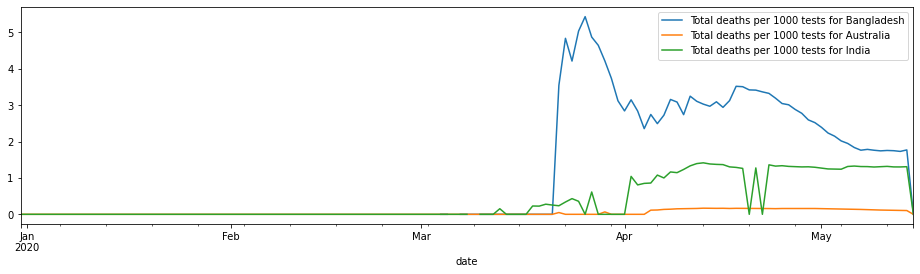

In [16]:
data_plot_deaths.plot()

In [17]:
data_plot_cases = pd.DataFrame({"Total cases per 1000 tests for Bangladesh": bangladesh["total_cases_normalized"],
                                "Total cases per 1000 tests for Australia": australia["total_cases_normalized"],
                                "Total cases per 1000 tests for India": india["total_cases_normalized"]})

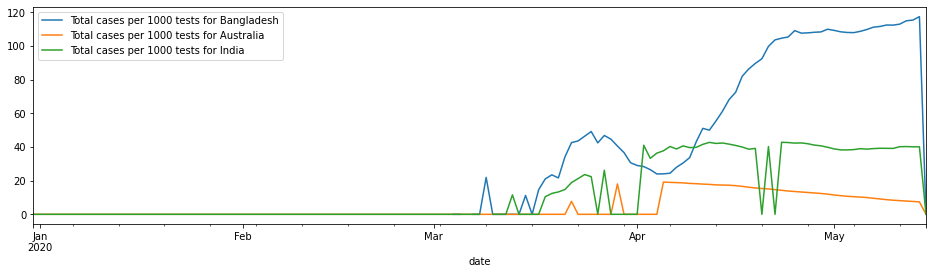

In [18]:
data_plot_cases.plot()

In [19]:
data_plot_deaths_smooth = data_plot_deaths.ewm(com=(1 - (1/data_plot_deaths.shape[0]))).mean()

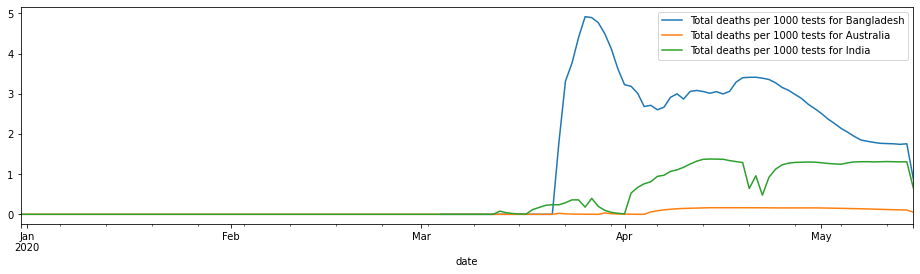

In [20]:
data_plot_deaths_smooth.plot()

In [21]:
data_plot_cases_smooth = data_plot_cases.ewm(com=(1 - (1/data_plot_cases.shape[0]))).mean()

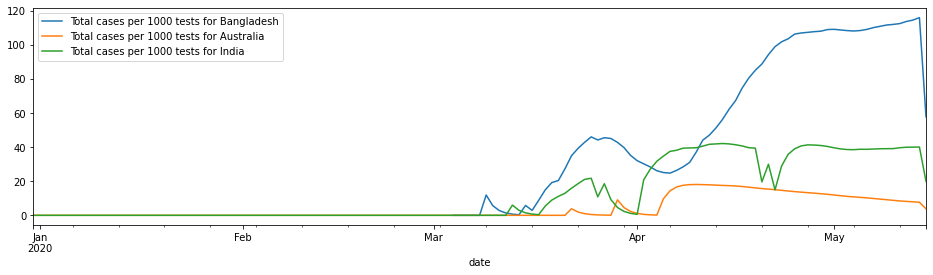

In [22]:
data_plot_cases_smooth.plot()

In [23]:
#data_plot_deaths.plot().get_figure().savefig("covid-deaths.png")
#data_plot_cases.plot().get_figure().savefig("covid-cases.png")